In [33]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,19)
plt.style.use('ggplot')
data = pd.read_csv('C:/Users/Anilkumar/Desktop/movie_metadata.csv')
print(data.shape)

(5043, 28)


In [34]:
data.columns
data['director_facebook_likes']
data.columns
newdata = data.iloc[:,4:6]
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN
...,...,...
5038,2.0,318.0
5039,NaN,319.0
5040,0.0,0.0
5041,0.0,489.0


In [35]:
newdata.apply(lambda x : sum(x.isnull()),axis=0)


director_facebook_likes    104
actor_3_facebook_likes      23
dtype: int64

In [36]:
newdata["director_facebook_likes"].fillna(newdata['director_facebook_likes'].mean(),inplace=True)
newdata["actor_3_facebook_likes"].fillna(newdata['actor_3_facebook_likes'].mean(),inplace=True)


In [38]:
newdata.apply(lambda x : sum(x.isnull()),axis=0)

director_facebook_likes    0
actor_3_facebook_likes     0
dtype: int64

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(newdata)
kmeans.cluster_centers_
print (len(kmeans.cluster_centers_))

5


In [40]:
print (kmeans.labels_)
print(len(kmeans.labels_))
print(type(kmeans.labels_))
unique,counts = np.unique(kmeans.labels_, return_counts = True)
print(dict(zip(unique,counts)))

[0 0 0 ... 0 0 0]
5043
<class 'numpy.ndarray'>
{0: 4775, 1: 66, 2: 87, 3: 104, 4: 11}


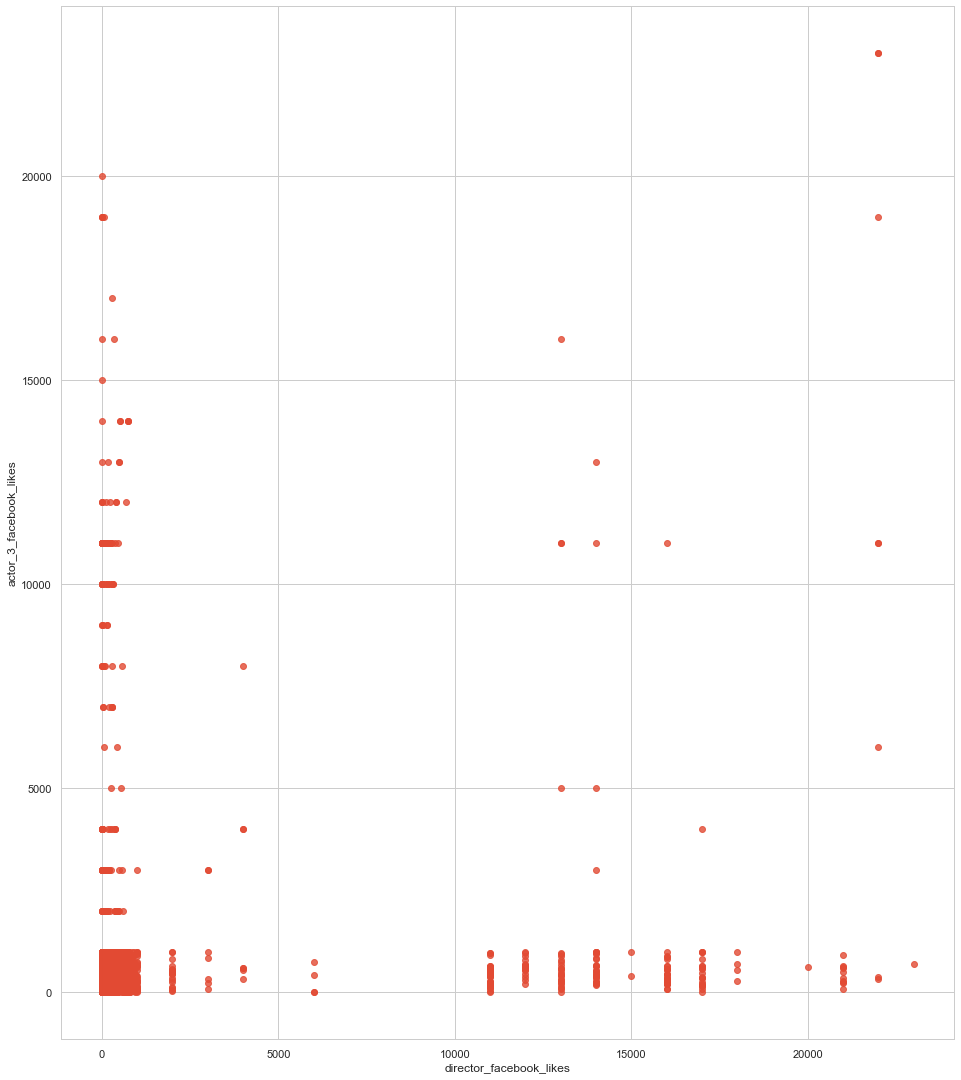

In [49]:
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
g = sns.regplot( x= newdata['director_facebook_likes'], y=newdata['actor_3_facebook_likes'],data='newdata', fit_reg = False)